<a href="https://colab.research.google.com/github/Jkanishkha0305/Hand-gesture/blob/main/CNN/handgestureNNFL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting the drive so that it will be easier to read datasets and no need to upload in the colab everytime
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing all the necessary libraries
import tensorflow as tf
import keras
from keras.callbacks import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import *

In [ ]:
#reading .csv file
traindata = pd.read_csv('drive/MyDrive/Colab_Assignments/NNFL/sign_mnist_train.csv')

In [ ]:


traindata.head(4)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163


In [ ]:
traindata.shape

(27455, 785)

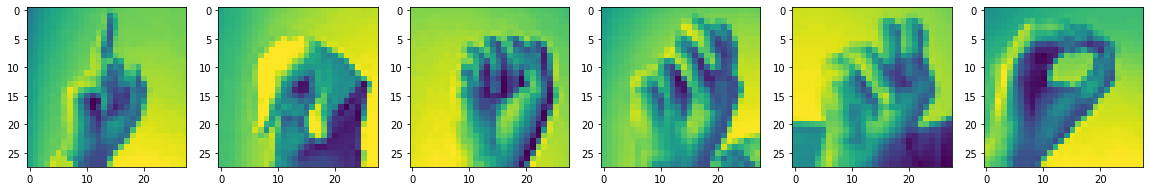

In [ ]:
#plotting random hand gesture images 
f = plt.figure(figsize=(20,6))
ax = f.add_subplot(161)
ax2 = f.add_subplot(162)
ax3 = f.add_subplot(163)
ax4 = f.add_subplot(164)
ax5 = f.add_subplot(165)
ax6 = f.add_subplot(166)
ax.imshow(traindata.iloc[0].values[1:].reshape(28,28))
ax2.imshow(traindata.iloc[5].values[1:].reshape(28,28))
ax3.imshow(traindata.iloc[20].values[1:].reshape(28,28))
ax4.imshow(traindata.iloc[456].values[1:].reshape(28,28))
ax5.imshow(traindata.iloc[999].values[1:].reshape(28,28))
ax6.imshow(traindata.iloc[1500].values[1:].reshape(28,28))
plt.show()

In [ ]:
#labelling and reshaping the file
trainlabel=traindata['label'].values
traindata.drop('label',inplace=True,axis=1)
trainimages = traindata.values
#reshape it to (28,28,1)-> (height,width,channels)
trainimages=trainimages.reshape(-1,28,28,1)

In [ ]:
#reading .csv file
testdata = pd.read_csv('drive/MyDrive/Colab_Assignments/NNFL/sign_mnist_test.csv')

In [ ]:
#labelling and reshaping the file
testlabel=testdata['label'].values
testdata.drop('label',inplace=True,axis=1)
testimages = testdata.values
testimages=testimages.reshape(-1,28,28,1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#data augmentation
traingen=ImageDataGenerator(rotation_range=20,
                            zoom_range=0.1,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            shear_range=0.1,
                            horizontal_flip=True,
                            rescale=1/255.0,#normalising the data
                            validation_split=0.2 #train_val split
                            )

In [ ]:
#generate train and validation dataset from train set 
traindata_generator = traingen.flow(trainimages,trainlabel,subset='training')
validationdata_generator = traingen.flow(trainimages,trainlabel,subset='validation')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


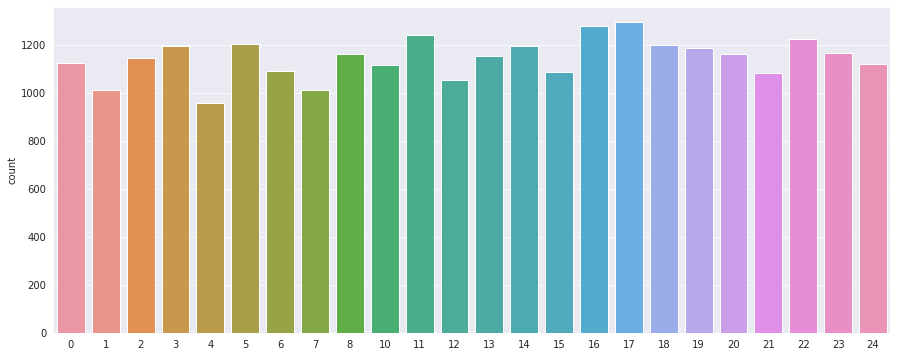

In [ ]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid");
sns.countplot(trainlabel);

In [ ]:
testgen=ImageDataGenerator(rescale=1/255.0)

In [ ]:
#generate test images
testdata_generator = testgen.flow(testimages,testlabel)

In [ ]:

model=Sequential([])

model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(26,activation="softmax"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.5%
class myCallback(Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True
callback=myCallback()

In [ ]:
dynamicrate = LearningRateScheduler(lambda x: 1e-3 * 0.1 ** x)

In [ ]:
history=model.fit(traindata_generator,epochs=50,validation_data=validationdata_generator,callbacks=[callback,dynamicrate])

Epoch 1/50
687/687 [==============================] - 34s 31ms/step - loss: 0.8853 - accuracy: 0.7282 - val_loss: 0.4448 - val_accuracy: 0.8552 - lr: 0.0010
Epoch 2/50
687/687 [==============================] - 21s 30ms/step - loss: 0.1896 - accuracy: 0.9503 - val_loss: 0.1113 - val_accuracy: 0.9758 - lr: 1.0000e-04
Epoch 3/50
687/687 [==============================] - 20s 30ms/step - loss: 0.1364 - accuracy: 0.9684 - val_loss: 0.0979 - val_accuracy: 0.9800 - lr: 1.0000e-05
Epoch 4/50
687/687 [==============================] - 21s 31ms/step - loss: 0.1327 - accuracy: 0.9683 - val_loss: 0.1005 - val_accuracy: 0.9767 - lr: 1.0000e-06
Epoch 5/50
687/687 [==============================] - 22s 31ms/step - loss: 0.1306 - accuracy: 0.9702 - val_loss: 0.0981 - val_accuracy: 0.9803 - lr: 1.0000e-07
Epoch 6/50
687/687 [==============================] - 21s 31ms/step - loss: 0.1298 - accuracy: 0.9683 - val_loss: 0.0976 - val_accuracy: 0.9783 - lr: 1.0000e-08
Epoch 7/50
687/687 [==================

KeyboardInterrupt: ignored

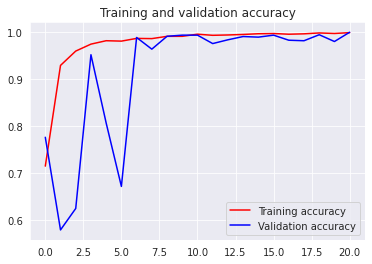

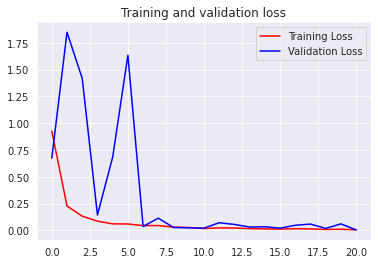

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#printing the training and validation accuracy graph
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

#printing the training and validation loss graph
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
loss,accuracy = model.evaluate(testdata_generator)

225/225 [==============================] - 1s 4ms/step - loss: 7.3402e-04 - accuracy: 1.0000


In [ ]:
#printing accuracy and loss
print("test accuracy: "+ str(accuracy*100))
print("test loss: "+ str(loss*100))

test accuracy: 100.0
test loss: 0.07340206648223102


In [ ]:
predictions = model.predict(testdata_generator)
#print("Predictions done...")
predictions

array([[1.5110874e-09, 1.1647133e-12, 7.6325427e-15, ..., 9.5951996e-11,
        1.7031163e-14, 9.3363624e-12],
       [1.3812375e-10, 1.3335730e-10, 9.0288804e-11, ..., 4.3741090e-07,
        5.3870763e-10, 4.2395734e-10],
       [1.0000000e+00, 2.2891788e-16, 7.9507408e-15, ..., 7.1567610e-19,
        8.1442611e-14, 2.5694595e-14],
       ...,
       [3.6195815e-14, 1.8723068e-10, 9.2784097e-14, ..., 1.1726253e-14,
        1.2538852e-13, 1.3697702e-13],
       [2.8870790e-15, 2.2854367e-07, 5.9345581e-14, ..., 2.4838577e-11,
        3.6465401e-12, 1.7479911e-12],
       [1.5953554e-11, 2.2240319e-16, 5.0604698e-09, ..., 9.3894860e-06,
        4.6626564e-11, 1.8488289e-10]], dtype=float32)

In [ ]:
import pickle

# save model
with open('handges.pkl','wb') as f:
    pickle.dump(history,f)

INFO:tensorflow:Assets written to: ram://e4370eb9-79b9-4804-8d9a-c549cfd12587/assets


In [ ]:
import pickle 

#save model
hg = 'cnn_model.sav'
pickle.dump(model,open(hg,'wb'))


INFO:tensorflow:Assets written to: ram://ae914604-48ad-41bd-95a6-6d4e0915bf7c/assets


In [ ]:
import keras 

#save a keras model
model.save("CNN.h5")
print("saved to disk")

saved to disk
